### 부동산 데이터 분석 프로젝트
1.매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

2.연도별 매각금액 추이 확인하기

3.상위 5개 지역별 매각 면적 확인하기

4.계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

# 전처리

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("한국자산관리공사_국유부동산 매각현황_20221231.csv", encoding='cp949')

In [3]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [4]:
# nan 값 제거

In [5]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [6]:
num = df['팀명'].dropna().index

In [7]:
drop_num=df.drop(index= num).index

In [8]:
df.drop(index=drop_num, inplace=True)

In [9]:
df # '팀명' 칼럼 결측치 제거 완료

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [10]:
df[df.duplicated()]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
285,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.00,38400000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
286,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,118030000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
287,2014,충청남도,충청남도 홍성군 광천읍 광천리 479-14,토지,대,319.00,118030000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
288,2014,충청남도,충청남도 홍성군 광천읍 광천리 241-2,토지,대,50.00,38400000.0,처분(매각수의),2014-01-07,대전충남지역본부,내포지부
6926,2014,인천광역시,인천광역시 중구 운서동 2788-6,토지,대,0.00,0.0,처분(매각입찰),2014-06-05,인천지역본부,국유재산관리팀
...,...,...,...,...,...,...,...,...,...,...,...
127329,2022,서울특별시,서울특별시 용산구 한남동 726-305,건물,확인불가,2.00,60000.0,처분(사용승인),2022-08-30,서울서부지역본부,국유재산3팀
127848,2022,서울특별시,서울특별시 은평구 갈현동 289-31,토지,구거,14.00,12290600.0,처분(매각수의),2022-01-27,서울서부지역본부,국유재산1팀
127850,2022,서울특별시,서울특별시 은평구 갈현동 289-31,토지,구거,44.00,38627600.0,처분(매각수의),2022-01-27,서울서부지역본부,국유재산1팀
127855,2022,서울특별시,서울특별시 은평구 갈현동 289-31,토지,구거,1.28,1123712.0,처분(매각수의),2022-01-27,서울서부지역본부,국유재산1팀


In [11]:
df = df[~df.duplicated()]
# 중복되는 행 제거 완료

# 1.매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [12]:
# 매각 금액 많은 팀, 적은팀 알아보기

In [13]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [14]:
df.groupby(df['대장금액(원)'])['팀명'].sum().max() # 매각 금액이 가장 많은 팀

'해안면무주지국유화지원추진단'

In [15]:
df.groupby(df['대장금액(원)'])['팀명'].sum().min() # 매각 금액이 가장 적은 팀

'국유 안동팀'

In [16]:
# 데이터 정리

In [17]:
df2 = df[df['팀명'].isin(['해안면무주지국유화지원추진단','국유 안동팀'])]

In [18]:
# '해안면무주지국유화지원추진단' '국유 안동팀' 차이 분석

In [19]:
# 통계검정

In [20]:
from scipy import stats

In [21]:
# 정규성 확인

In [22]:
m1 = df2['팀명']=='해안면무주지국유화지원추진단'

In [23]:
m2 = df2['팀명']=='국유 안동팀'

In [24]:
max_team = df2[m1]['대장금액(원)']
min_team = df2[m2]['대장금액(원)']

In [25]:
stats.shapiro(max_team) # p>0.05이므로 정규성 만족

ShapiroResult(statistic=0.8970823287963867, pvalue=0.41671162843704224)

In [26]:
stats.shapiro(min_team) # p=0.05 이므로 정규성 불만족

ShapiroResult(statistic=0.24378949403762817, pvalue=0.0)

In [27]:
# 정규성 불만족이므로 Mann-Whitney U test 사용

In [28]:
# Mann-Whitney U test

In [29]:
stats.mannwhitneyu(max_team, min_team)
# p>0.05, 귀무가설 채택, 귀무가설:서로 다른 차이가 없다.
# 결론: 두 그룹 사이에 유의한 차이가 없다.

MannwhitneyuResult(statistic=3074.0, pvalue=0.33568208890539886)

In [30]:
# 그래프 그리기

In [31]:
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt

In [33]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='white')

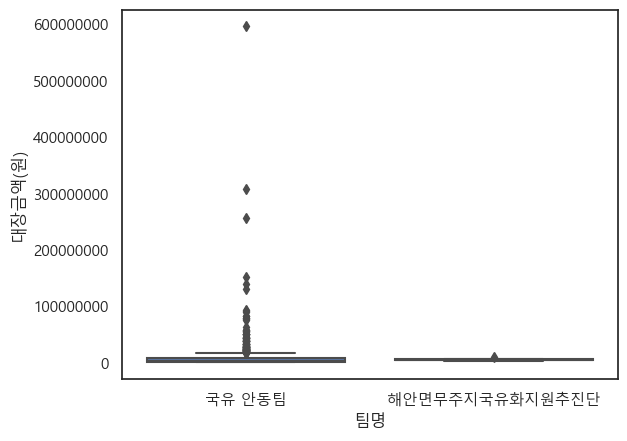

In [38]:
sns.boxplot(data=df2, x='팀명', y='대장금액(원)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

In [42]:
import numpy as np

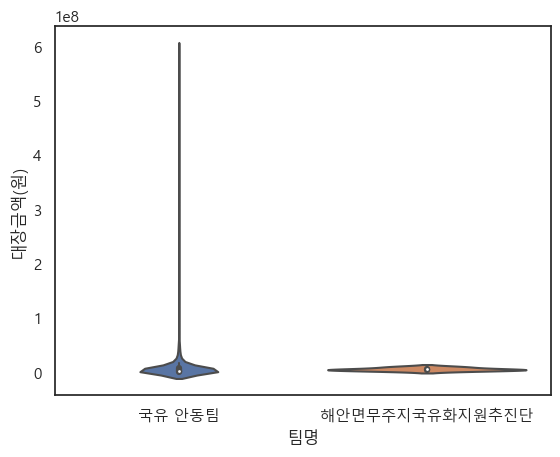

In [35]:
sns.violinplot(data=df2, x='팀명', y='대장금액(원)')
plt.show()

# 2.연도별 매각금액 추이 확인하기

<Axes: xlabel='연도구분', ylabel='대장금액(원)'>

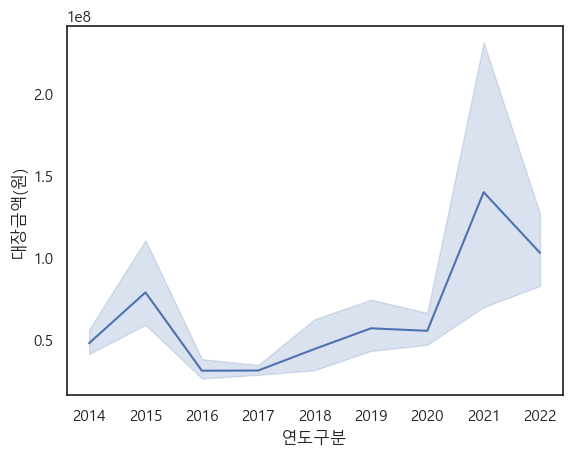

In [49]:
sns.lineplot(data=df, x="연도구분", y="대장금액(원)")

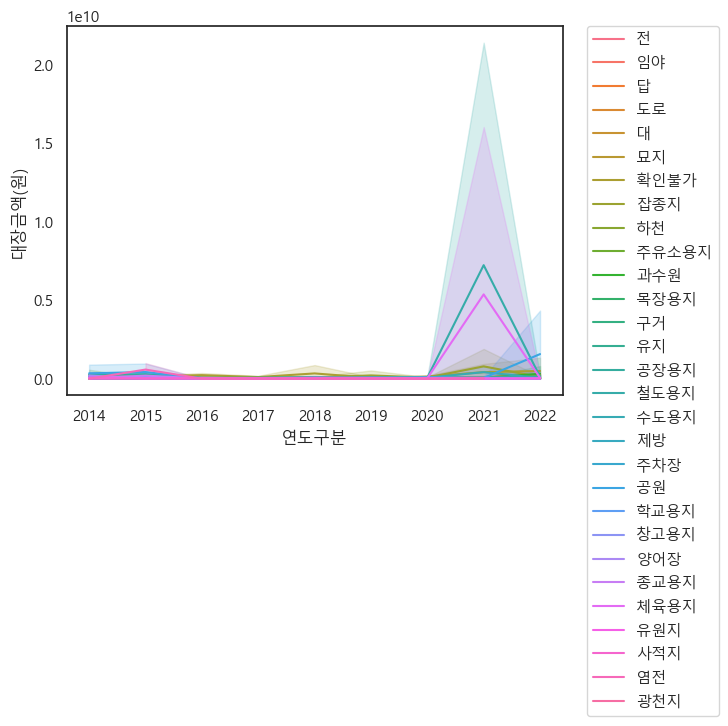

In [48]:
sns.lineplot(data=df, x="연도구분", y="대장금액(원)", hue='공부지목')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

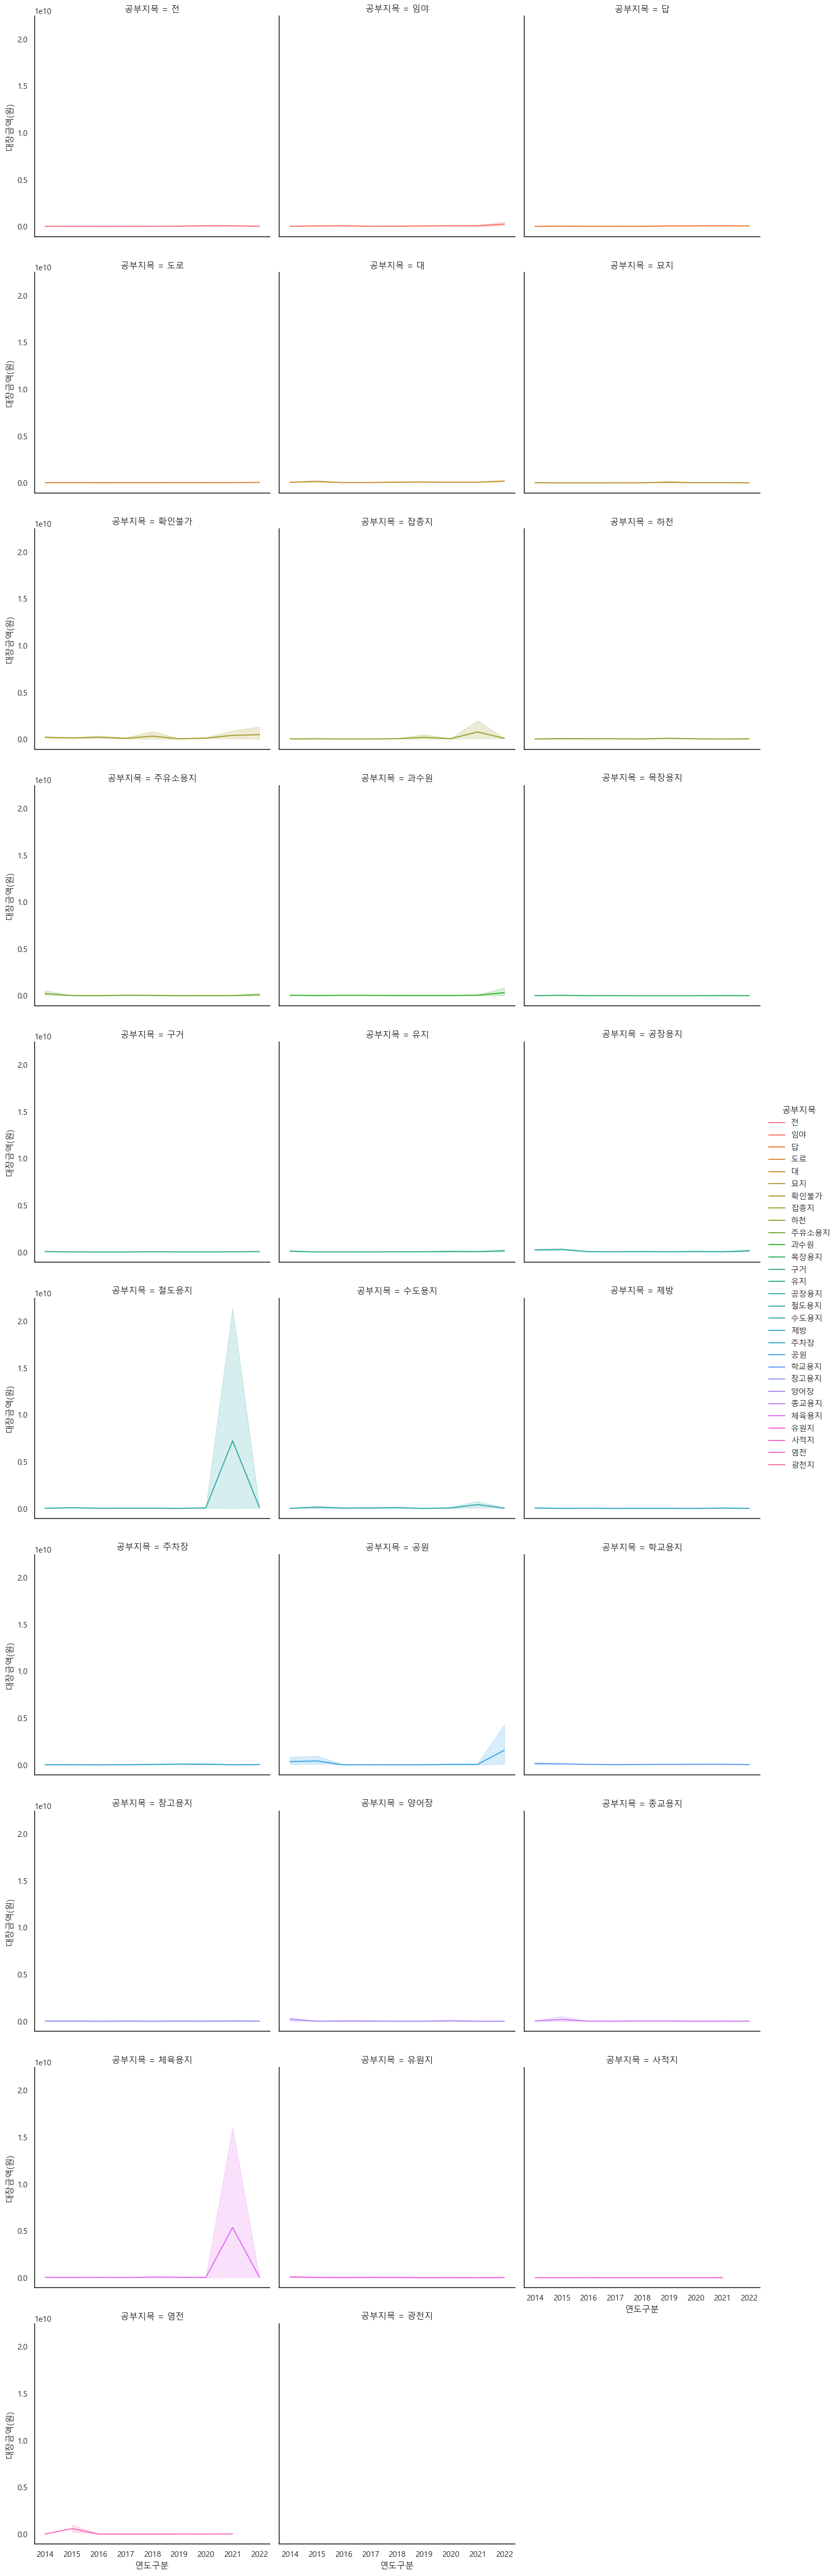

In [50]:
sns.relplot(data=df, x="연도구분", y="대장금액(원)", hue="공부지목", kind="line", col="공부지목", col_wrap=3)

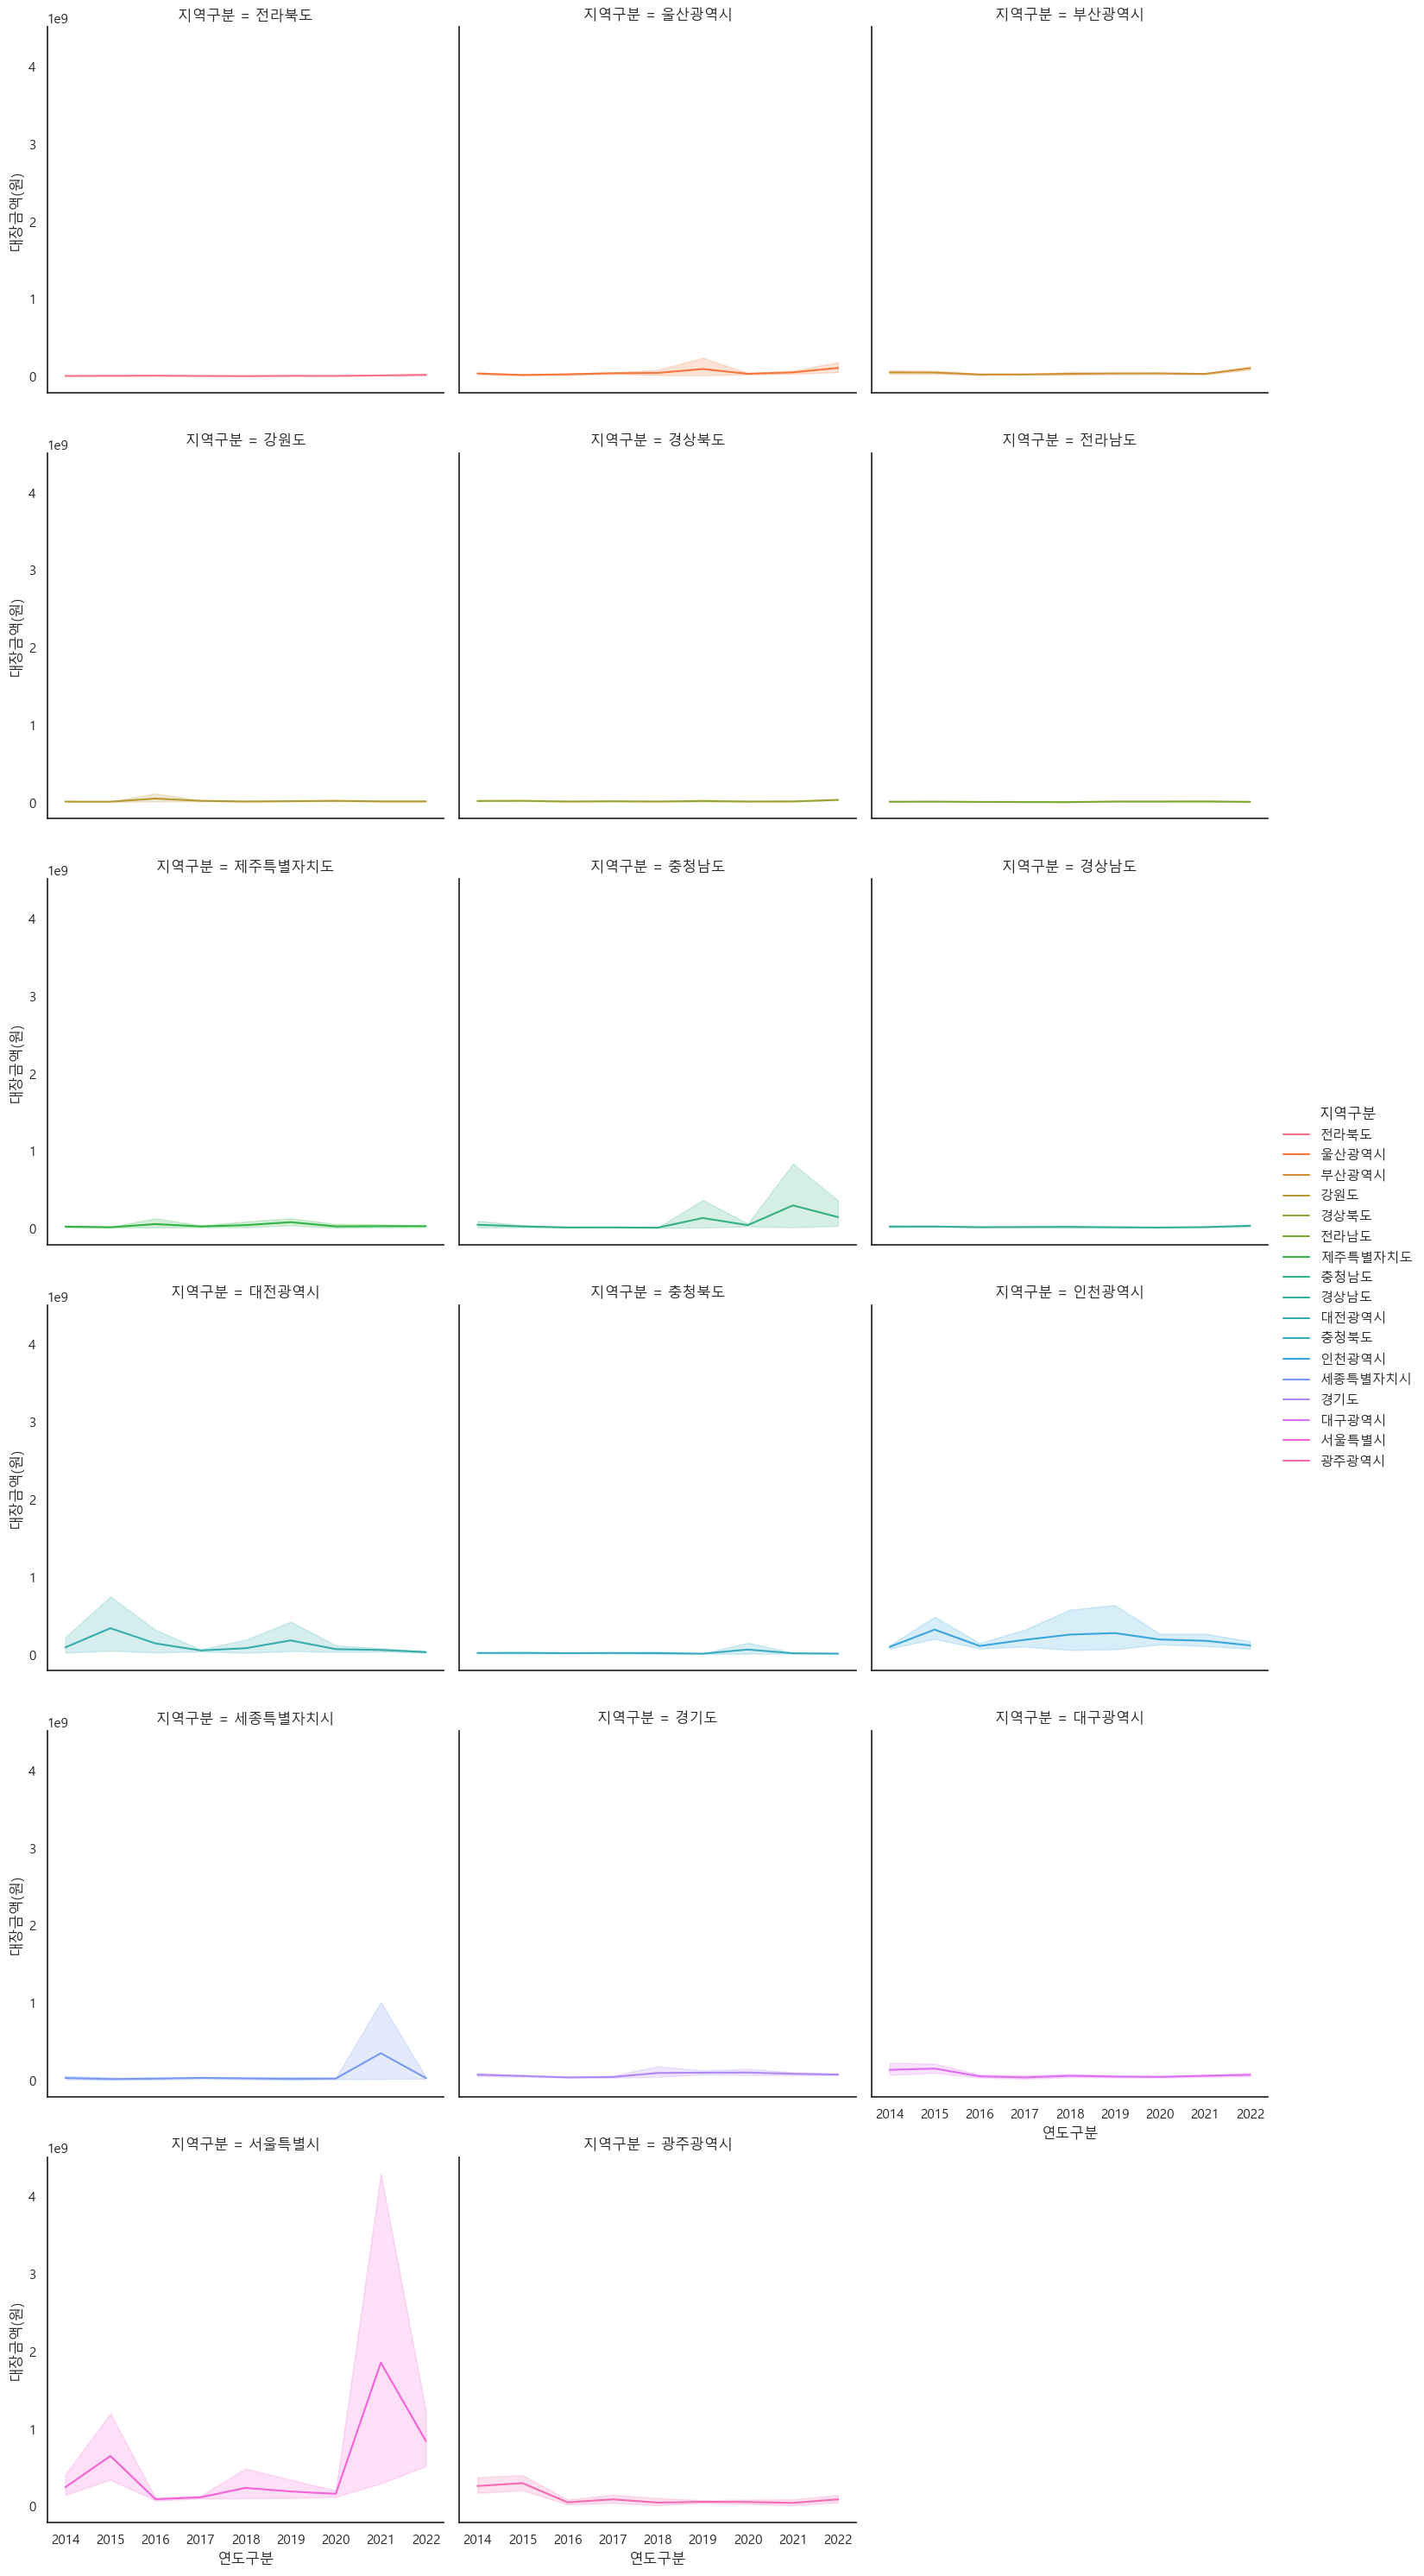

In [44]:
sns.relplot(data=df, x="연도구분", y="대장금액(원)", hue="지역구분", kind="line", col="지역구분", col_wrap=3)

# 3.상위 5개 지역별 매각 면적 확인하기
- 지역 별 매각면적 상위 5위까지 확인하기
- ex) 전라북도의 상위 5개 매각면적

In [51]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [68]:
df[df['지역구분']=='전라북도']['대장면적(제곱미터)'].sort_values(ascending=False).head()

40108    135273.0
40431    118958.0
89845    114207.0
40779     96793.0
40106     95802.0
Name: 대장면적(제곱미터), dtype: float64

In [62]:
df[df['지역구분']=='전라북도']['대장면적(제곱미터)'].max()

135273.0

In [66]:
df['지역구분'].values[0]

'전라북도'

In [78]:
list_name = list(df['지역구분'].unique())

In [80]:
list_name

['전라북도',
 '울산광역시',
 '부산광역시',
 '강원도',
 '경상북도',
 '전라남도',
 '제주특별자치도',
 '충청남도',
 '경상남도',
 '대전광역시',
 '충청북도',
 '인천광역시',
 '세종특별자치시',
 '경기도',
 '대구광역시',
 '서울특별시',
 '광주광역시']

In [87]:
for i in list_name:
    a = df['지역구분']==i
    b =df[a]['대장면적(제곱미터)'].sort_values(ascending=False).head()
    print('지역이름:',i)
    print(b)

지역이름: 전라북도
40108    135273.0
40431    118958.0
89845    114207.0
40779     96793.0
40106     95802.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 울산광역시
15999    54645.0
15226    14290.0
16035    12793.0
17123    12788.0
96514    11245.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 부산광역시
43988    797656.0
43977    224033.0
15002    223472.0
98932     64710.0
17697     32295.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 강원도
42119    2024292.0
42121     464607.0
42118     269016.0
99952     167802.0
99951     109289.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 경상북도
49677    89686.0
80074    71008.0
16577    62221.0
56553    51961.0
93473    48397.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 전라남도
5648     392563.0
37884     84940.0
37591     84298.0
38059     80502.0
38024     76958.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 제주특별자치도
94050    63570.0
93974    56430.0
94030    48603.0
94035    41768.0
94051    37731.0
Name: 대장면적(제곱미터), dtype: float64
지역이름: 충청남도
12055     967483.0
91450     679002.0
119719    679002.0


# 4.계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

In [16]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [89]:
df['계약일자'].value_counts()

2017-12-01    600
2016-11-30    504
2022-07-25    486
2020-04-01    442
2019-08-29    432
             ... 
2017-10-06      1
2011-12-20      1
2018-07-07      1
2018-07-29      1
2022-01-23      1
Name: 계약일자, Length: 2784, dtype: int64

In [17]:
df[df['계약일자'] == '2017-12-01']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
53190,2017,경기도,경기도 안성시 일죽면 방초리 81,토지,전,149.0,6287800.0,처분(매각입찰),2017-12-01,경기지역본부,국유평택팀
53266,2017,부산광역시,부산광역시 강서구 강동동 3944-23,토지,대,85.0,29926800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀
53267,2017,부산광역시,부산광역시 강서구 강동동 4357-2,토지,대,195.0,76479000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀
53268,2017,부산광역시,부산광역시 강서구 강동동 4931-9,토지,전,86.0,6862800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀
53269,2017,부산광역시,부산광역시 강서구 대저2동 5406-3,토지,대,360.0,133488000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀
...,...,...,...,...,...,...,...,...,...,...,...
75281,2017,경상남도,경상남도 합천군 합천읍 합천리 82-42,토지,전,61.0,1079700.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75283,2017,경상남도,경상남도 합천군 합천읍 합천리 96-16,토지,전,13.0,230100.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75284,2017,경상남도,경상남도 합천군 합천읍 합천리 82-37,토지,제방,424.0,8459850.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75285,2017,경상남도,경상남도 합천군 합천읍 합천리 82-43,토지,하천,175.0,2730000.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀


In [15]:
import ydata_profiling

In [18]:
date = df['계약일자']=='2017-12-01'

In [19]:
profile = df[date].profile_report()

In [20]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]